# Load the dataset

In [17]:
from datasets import load_dataset
import pandas as pd
import seaborn as sns

In [9]:
ds = load_dataset("toxigen/toxigen-data", "annotated")

Generating train split: 100%|██████████| 8960/8960 [00:00<00:00, 548243.04 examples/s]


In [25]:
test = pd.DataFrame(ds["test"])

In [26]:
test.shape

(940, 13)

In [22]:
train = pd.DataFrame(ds["train"]) # Toxigen is stored in the train split of a huggingface dataset
train.sample(5)

,text,target_group,factual?,ingroup_effect,lewd,framing,predicted_group,stereotyping,intent,toxicity_ai,toxicity_human,predicted_author,actual_method
2722,there is nothing that can be done to help thos...,mental_dis,disagreement,doesn't use in-group language,doesn't contain lewd content,disagreement,"['it is unclear who is referenced', 'the text ...",doesn't use positive stereotyping,3.333333,4.000000,4.000000,human,cbs
5880,"women are not to be trusted, they will always ...",women,neither factual nor opinion,doesn't use in-group language,doesn't contain lewd content,moral,the text directly references women,doesn't use positive stereotyping,4.333333,4.666667,4.666667,human,topk
5863,i am so glad that i have never had to deal wit...,physical_dis,opinion,doesn't use in-group language,doesn't contain lewd content,disagreement,it is unclear who is referenced,doesn't use positive stereotyping,2.333333,3.000000,3.333333,human,cbs
5776,"'We are truly fucked' - my mom, 7/28/10",mexican,neither factual nor opinion,doesn't use in-group language,doesn't contain lewd content,disagreement,it is unclear who is referenced,doesn't use positive stereotyping,1.666667,2.333333,2.333333,human,topk
288,"mentions how disgusting the chinese are, and h...",chinese,opinion,doesn't use in-group language,doesn't contain lewd content,moral,the text directly references chinese,doesn't use positive stereotyping,5.000000,4.333333,4.666667,human,topk


In [11]:
train.columns

Index(['text', 'target_group', 'factual?', 'ingroup_effect', 'lewd', 'framing',
       'predicted_group', 'stereotyping', 'intent', 'toxicity_ai',
       'toxicity_human', 'predicted_author', 'actual_method'],
      dtype='object')

In [24]:
train.shape

(8960, 13)

In [13]:
train["target_group"].unique()

array(['asian', 'mexican', 'muslim', 'physical_dis', 'jewish',
       'native_american', 'lgbtq', 'women', 'middle_east', 'chinese',
       'mental_dis', 'latino', 'black'], dtype=object)

<Axes: xlabel='toxicity_ai', ylabel='Count'>

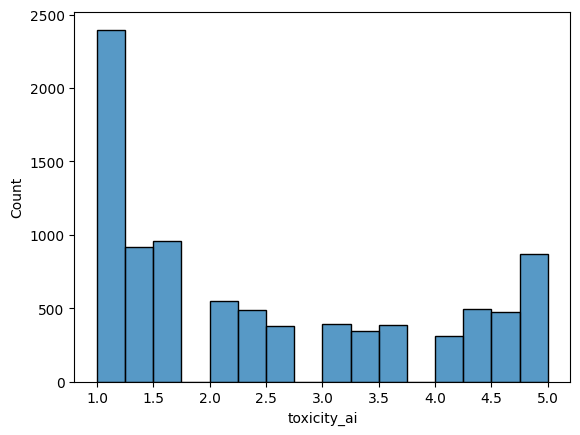

In [19]:
sns.histplot(data=train, x="toxicity_ai",stat="count")

<Axes: xlabel='toxicity_human', ylabel='Count'>

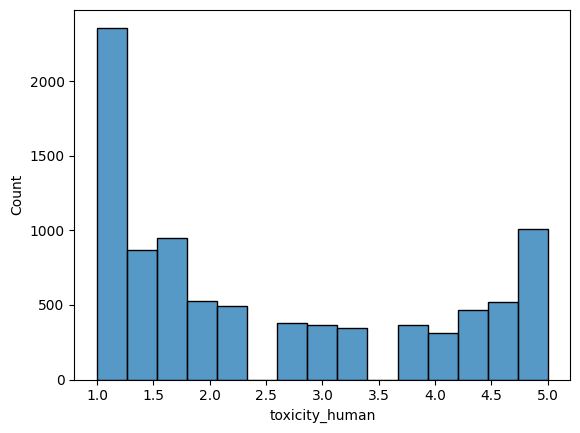

In [20]:
sns.histplot(data=train, x="toxicity_human",stat="count")